In [1]:
## !!! ##
#!pip install ruff
#!pip install pandas
#!pip3 install ruff
#!pip3 install pandas

In [7]:
# Execute plot() inline without calling show()
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('datasets/sms_spam_perceptron.csv')

y = df.iloc[:, 0].values
y = np.where(y == 'spam', -1, 1)

X = df.iloc[:, [1, 2]].values

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)



In [9]:
from sklearn.linear_model import Perceptron

p = Perceptron(max_iter=40, eta0=0.1, random_state=0)
p.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=40)

In [10]:
y_pred = p.predict(X_test)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ''

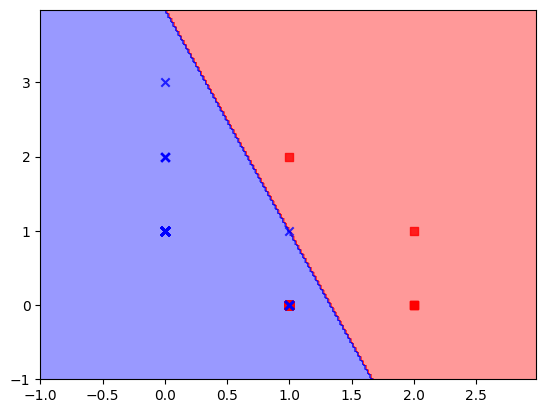

In [12]:
# 'plot_decision_regions' from https://github.com/rasbt/python-machine-learning-book
# !pip install git+git://github.com/rasbt/python-machine-learning-book.git

from defs import plot_decision_regions

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=p, test_idx=range(-5, 5))
plt.xlabel('suspect words')
plt.ylabel('spam or ham')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))